### Credit to course presented by [YK Sugishita](https://app.pluralsight.com/library/courses/data-visualization-with-python-introduction/exercise-files)

### Why data visualization.

- First step and crucial step  in all kinds of analysis (A/B testing, statistical analysis, data mining and machine learning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Matplotlib

- Bar Chart
- Scatter plot
- line chart or time series

In [2]:
dt = pd.read_csv('countries.csv')
dt.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
dt_2007 = dt[dt['year']==2007]

americas_2007 = dt_2007[dt_2007['continent']=='Americas']
asia_2007 = dt_2007[dt_2007['continent']=='Asia']

In [4]:
print(len(set(americas_2007.country)))
print(len(set(asia_2007.country)))

25
33


In [5]:
print("Mean life expentency in Americas is: {0}".format(americas_2007.lifeExpectancy.mean()))
print("Mean life expentency in Asia is: {0}".format(asia_2007.lifeExpectancy.mean()))
print("Median life expentency in Americas is: {0}".format(americas_2007.lifeExpectancy.median()))
print("Median life expentency in Asia is: {0}".format(asia_2007.lifeExpectancy.median()))

Mean life expentency in Americas is: 73.60812000000001
Mean life expentency in Asia is: 70.72848484848484
Median life expentency in Americas is: 72.899
Median life expentency in Asia is: 72.396


### Histogram

- Distribution

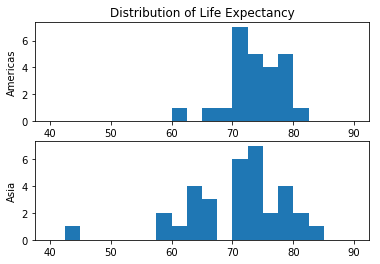

In [7]:
plt.subplot(211)
plt.title('Distribution of Life Expectancy')
plt.hist(americas_2007.lifeExpectancy, 20, range=(40,90))
plt.ylabel('Americas')
plt.subplot(212)
plt.hist(asia_2007.lifeExpectancy, 20, range=(40,90))
plt.ylabel('Asia')
plt.show()

In [8]:
asia_2007[asia_2007['lifeExpectancy'] < 50]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338


### Line Chart/Time Series

- examines a trend over time
- tests a hypothesis on a variety of conditions
- reduces misinterpretation of data

In [9]:
us = dt[dt.country=='United States']
ch = dt[dt.country=='China']

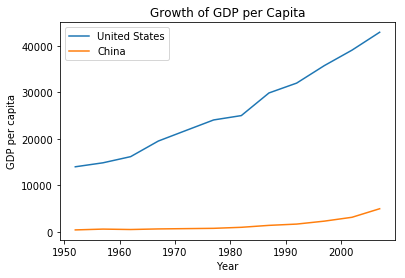

In [10]:
plt.plot(us.year, us.gdpPerCapita)
plt.plot(ch.year, ch.gdpPerCapita)
plt.title('Growth of GDP per Capita')
plt.legend(['United States', 'China'])
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

In [11]:
us_growth = us.gdpPerCapita / us.gdpPerCapita.iloc[0] * 100
ch_growth = ch.gdpPerCapita / ch.gdpPerCapita.iloc[0] * 100

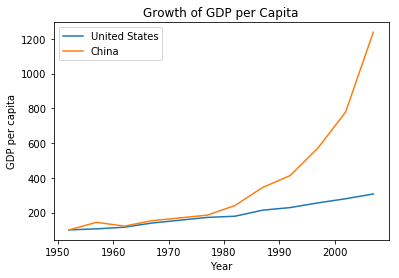

In [12]:
plt.plot(us.year, us_growth)
plt.plot(ch.year, ch_growth)
plt.title('Growth of GDP per Capita')
plt.legend(['United States', 'China'])
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

### Scatter Plots

- examine the correlation of two numeric variables

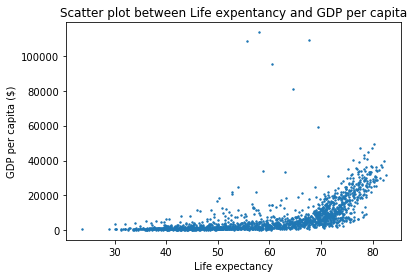

In [13]:
plt.scatter(dt.lifeExpectancy,dt.gdpPerCapita, 2 )
plt.title('Scatter plot between Life expentancy and GDP per capita')
plt.ylabel('GDP per capita ($)')
plt.xlabel("Life expectancy")
plt.show()

In [14]:
dt.lifeExpectancy.corr(dt.gdpPerCapita)

0.58370621986598059

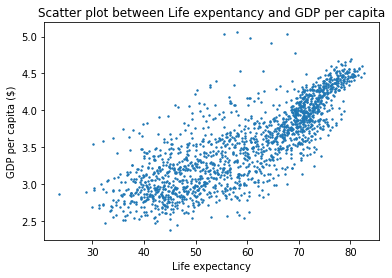

In [15]:
plt.scatter(dt.lifeExpectancy,np.log10(dt.gdpPerCapita), 2 )
plt.title('Scatter plot between Life expentancy and GDP per capita')
plt.ylabel('GDP per capita ($)')
plt.xlabel("Life expectancy")
plt.show()

In [16]:
dt.lifeExpectancy.corr(np.log10(dt.gdpPerCapita))

0.80761787930806694

In [17]:
years_sorted = sorted(dt.year.unique())
years_sorted

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

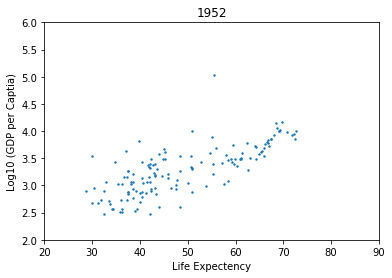

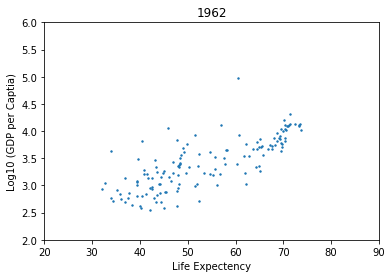

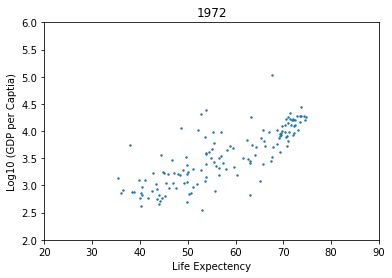

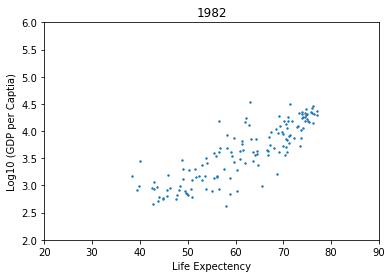

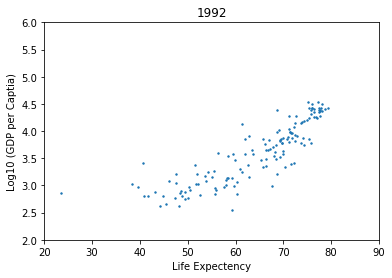

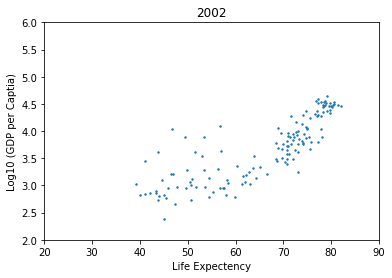

In [18]:
for yr in years_sorted:
    if yr % 2 == 0:
        dt_yr = dt[dt.year==yr]
        plt.scatter(dt_yr.lifeExpectancy,np.log10(dt_yr.gdpPerCapita), 2)
        plt.title(yr)
        plt.xlim(20, 90)
        plt.ylim(2.0,6.0)
        plt.ylabel('Log10 (GDP per Captia)')
        plt.xlabel('Life Expectency')
        plt.show()
        #plt.savefig(str(yr), dpi=200) dpi = dots per inch
        #plt.clf() to clear the current        

### Bar graphs

- Compare numeric values among several groups

In [19]:
dt_2007 = dt[dt.year==2007]
dt_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [20]:
top10_2007 = dt_2007.sort_values('population', ascending=False)[:10]

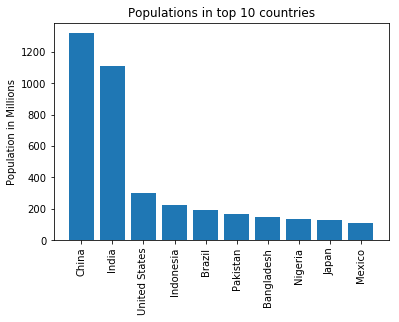

In [21]:
x = range(10)
plt.bar(x, top10_2007['population']/10**6)
plt.title('Populations in top 10 countries')
plt.xticks(x, top10_2007.country, rotation='vertical') ## very nice
plt.ylabel('Population in Millions')
plt.show()

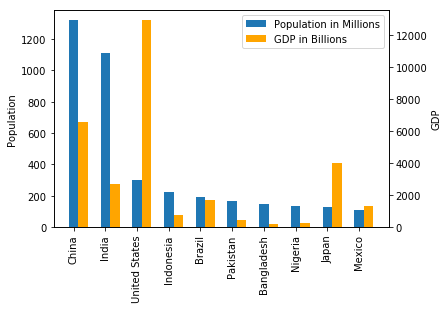

In [22]:
x = np.arange(10)

# create subplots in order to overlay two bar plots
fig, ax1 = plt.subplots()

width = 0.3 # This is the width of each bar in the bar plot.
plt.xticks(x, top10_2007.country, rotation='vertical')
population = ax1.bar(x, top10_2007.population / 10**6, width)
plt.ylabel('Population')

# ax1.twinx() gives us the same x-axis with the y-axis on the right.
ax2 = ax1.twinx()
gdp = ax2.bar(x + width, top10_2007.gdpPerCapita * top10_2007.population / 10**9,
              width, color='orange')
plt.ylabel('GDP')
plt.legend([population, gdp],
           ['Population in Millions', 'GDP in Billions'])
figure = plt.gcf() # get current figure
plt.show()

### When data is too Big

- Aggregation and summary
- Random sampling

In [23]:
ob = pd.read_csv('obama.csv', parse_dates=['year_month'])
ob.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


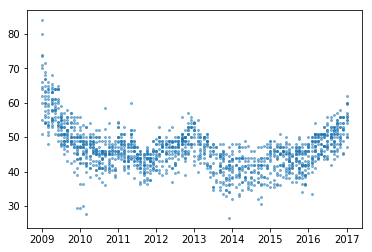

In [24]:
plt.plot(ob.year_month, ob.approve_percent, 'o', markersize=2, alpha=0.5)
plt.show()

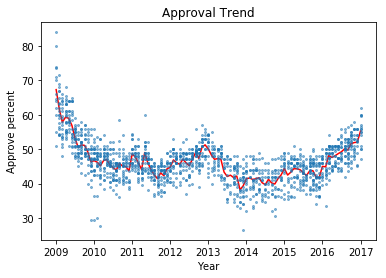

In [25]:
dt_mean = ob.groupby('year_month').mean()
plt.plot(dt_mean.index, dt_mean.approve_percent, 'red')
plt.plot(ob.year_month, ob.approve_percent, 'o', markersize=2, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Approve percent')
plt.title('Approval Trend')
plt.show()

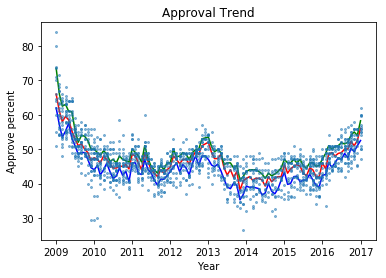

In [26]:
dt_25 = ob.groupby('year_month').quantile(0.25)
dt_75 = ob.groupby('year_month').quantile(0.75)
dt_median = ob.groupby('year_month').median()
plt.plot(dt_mean.index, dt_median.approve_percent, 'red')
plt.plot(dt_mean.index, dt_25.approve_percent, 'blue')
plt.plot(dt_mean.index, dt_75.approve_percent, 'green')
plt.plot(ob.year_month, ob.approve_percent, 'o', markersize=2, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Approve percent')
plt.title('Approval Trend')
plt.show()

In [27]:
ob_big = pd.read_csv('obama_too_big.csv', parse_dates=['year_month'])
ob_big.shape

(65499, 4)

In [28]:
dt_sample = ob_big.sample(frac=0.1)
dt_sample.shape

(6550, 4)